In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
import pandas as pd
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

from sklearn.model_selection import train_test_split
import re


In [4]:
df = pd.read_csv('hyderabad_first_type_000.csv')


df.head()

,Price,Carpet Area,Bedrooms,Builder,Paid User,Locality,Property Type,User Type,Prime Location,Agent,Link,Prop ID,Other
0,49.3 Lac,N,2,ELV Projects Private Limited,Y,Adibatla,Apartment,Builder,Y,RANJITH DORA,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_54364457,***super area*1285 sqft*****transaction*New Pr...
1,79.9 Lac,NaN,2,NaN,Y,"Manikonda, Outer Ring Road",Apartment,Builder,Y,Pavan Kumar,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_56459889,***super area*1268 sqft****status*Ready to Mov...
2,86.3 Lac,NaN,2,Silversand Infratech Pvt. Ltd,Y,Hitech City,Apartment,Builder,Y,Shegur,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_54835677,***super area*1150 sqft****status*Ready to Mov...
3,40.9 Lac,N,2,NaN,Y,Aminpur,Apartment,Builder,Y,Kumaran A,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_55539835,***super area*918 sqft****status**\t\t\t\t\t\t...
4,1.35 Cr,N,3,Sri Aditya Homes Pvt. Ltd.,Y,Shaikpet,Apartment,Builder,Y,Ranjani,https://www.magicbricks.com/propertyDetails/3-...,domcache_srp_50279054,***super area*1895 sqft****status**\t\t\t\t\t\...


In [5]:
crore_prices_index = df[df['Price'].str.contains('Cr')].index
df.drop(crore_prices_index, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,Price,Carpet Area,Bedrooms,Builder,Paid User,Locality,Property Type,User Type,Prime Location,Agent,Link,Prop ID,Other
0,49.3 Lac,N,2,ELV Projects Private Limited,Y,Adibatla,Apartment,Builder,Y,RANJITH DORA,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_54364457,***super area*1285 sqft*****transaction*New Pr...
1,79.9 Lac,NaN,2,NaN,Y,"Manikonda, Outer Ring Road",Apartment,Builder,Y,Pavan Kumar,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_56459889,***super area*1268 sqft****status*Ready to Mov...
2,86.3 Lac,NaN,2,Silversand Infratech Pvt. Ltd,Y,Hitech City,Apartment,Builder,Y,Shegur,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_54835677,***super area*1150 sqft****status*Ready to Mov...
3,40.9 Lac,N,2,NaN,Y,Aminpur,Apartment,Builder,Y,Kumaran A,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_55539835,***super area*918 sqft****status**\t\t\t\t\t\t...
4,78.4 Lac,N,2,BEL,Y,Moti Nagar,Apartment,Builder,Y,Brigade,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_56379877,***super area*1174 sqft****status**\t\t\t\t\t\...


In [6]:
pattern = r'(\d+)-Sq-ft'
df['Sqft'] = df['Link'].str.extract(pattern)
pattern = r'(\d+)'
df['Price'] = df['Price'].str.extract(pattern)
df.head()


,Price,Carpet Area,Bedrooms,Builder,Paid User,Locality,Property Type,User Type,Prime Location,Agent,Link,Prop ID,Other,Sqft
0,49,N,2,ELV Projects Private Limited,Y,Adibatla,Apartment,Builder,Y,RANJITH DORA,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_54364457,***super area*1285 sqft*****transaction*New Pr...,1285
1,79,NaN,2,NaN,Y,"Manikonda, Outer Ring Road",Apartment,Builder,Y,Pavan Kumar,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_56459889,***super area*1268 sqft****status*Ready to Mov...,1268
2,86,NaN,2,Silversand Infratech Pvt. Ltd,Y,Hitech City,Apartment,Builder,Y,Shegur,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_54835677,***super area*1150 sqft****status*Ready to Mov...,1150
3,40,N,2,NaN,Y,Aminpur,Apartment,Builder,Y,Kumaran A,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_55539835,***super area*918 sqft****status**\t\t\t\t\t\t...,918
4,78,N,2,BEL,Y,Moti Nagar,Apartment,Builder,Y,Brigade,https://www.magicbricks.com/propertyDetails/2-...,domcache_srp_56379877,***super area*1174 sqft****status**\t\t\t\t\t\...,1174


In [7]:
df.drop(columns=["Agent","Prime Location","Paid User","Carpet Area"], inplace=True)
df.drop(columns=["User Type","Link","Prop ID"], inplace=True)
df.drop(columns=["Other"], inplace=True)
df.head()


,Price,Bedrooms,Builder,Locality,Property Type,Sqft
0,49,2,ELV Projects Private Limited,Adibatla,Apartment,1285
1,79,2,NaN,"Manikonda, Outer Ring Road",Apartment,1268
2,86,2,Silversand Infratech Pvt. Ltd,Hitech City,Apartment,1150
3,40,2,NaN,Aminpur,Apartment,918
4,78,2,BEL,Moti Nagar,Apartment,1174


In [7]:
#df.to_excel("hyd_prices.xlsx")


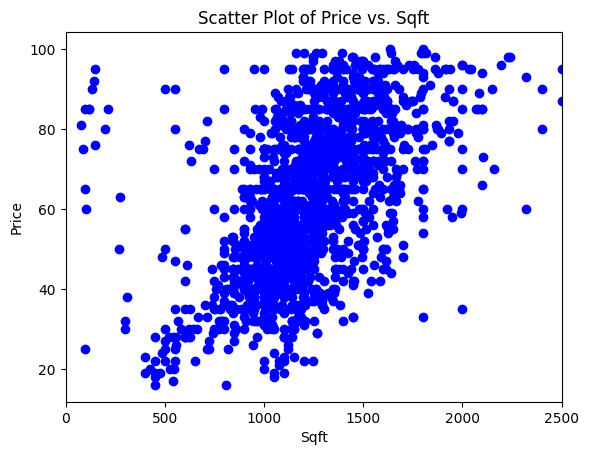

In [8]:
d = df.sample(frac=0.2,random_state=42)

plt.scatter(df['Sqft'].astype(float), df['Price'].astype(float), color='blue')
plt.xlabel('Sqft')
plt.xlim(0,2500)
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs. Sqft')
plt.show()


LINEAR REGRESSION

In [33]:
reg_obj = linear_model.LinearRegression()
df.dropna(subset=['Sqft'], inplace=True)

reg_obj.fit(df[['Sqft']].values.reshape(-1, 1), df['Price'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1795 entries, 0 to 1870
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Price          1795 non-null   object
 1   Bedrooms       1789 non-null   object
 2   Builder        148 non-null    object
 3   Locality       1711 non-null   object
 4   Property Type  1795 non-null   object
 5   Sqft           1795 non-null   object
dtypes: object(6)
memory usage: 98.2+ KB


In [34]:
predicted_price = reg_obj.predict(np.array([2000]).reshape(-1, 1))
print(predicted_price)

[79.00266578]


In [35]:
print(reg_obj.intercept_)
reg_obj.coef_

35.076471282286626


array([0.0219631])

DATA CLEANING AND ANALYSIS

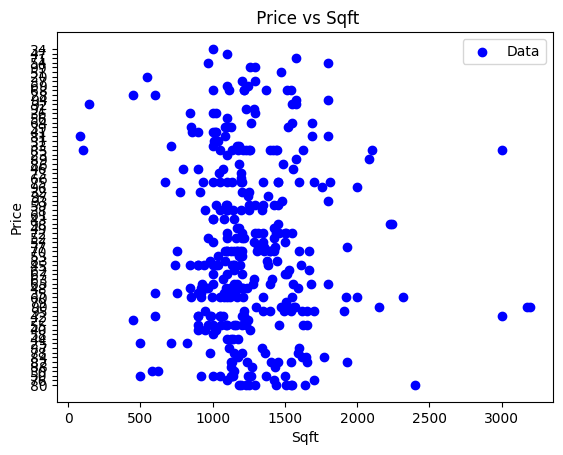

In [10]:
d['Sqft'] = pd.to_numeric(d['Sqft'], errors='coerce')
 
plt.scatter(d['Sqft'], d['Price'], color='blue', label='Data')

# pred = [1000, 1200, 3000, 2000, 2400, 1600, 1989]

#  plt.plot(pred, reg_obj.predict(np.array(pred).reshape(-1, 1)), color='red', label='Regression Line')

# Set labels and title
plt.xlabel('Sqft')
plt.ylabel('Price')
plt.title(' Price vs Sqft')

# Show legend
plt.legend()


In [40]:
df.describe()

,Price,Bedrooms,Builder,Locality,Property Type,Sqft
count,1795,1789,148,1711,1795,1795
unique,85,7,142,463,6,509
top,75,2,Real Estate,Bachupally,Apartment,1100
freq,74,1159,3,57,1575,79


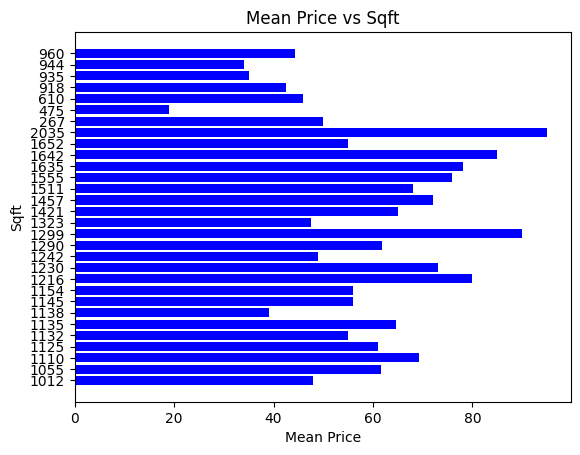

In [13]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
d['Sqft'] = pd.to_numeric(d['Sqft'], errors='coerce')
 
grouped_data = df.groupby('Sqft')['Price'].mean().reset_index()
random_locations = grouped_data['Sqft'].sample(n=30, random_state=42)
sample_df = grouped_data[grouped_data['Sqft'].isin(random_locations)]
plt.barh(sample_df['Sqft'], sample_df['Price'], color='blue')
plt.ylabel('Sqft')
plt.xlabel('Mean Price')
plt.title('Mean Price vs Sqft')

# Show the plot
plt.show()

In [14]:
groupeddata = df.groupby('Locality')['Price'].mean().reset_index()
random_locations = groupeddata['Locality'].sample(n=30, random_state=42)
sample_df = groupeddata[groupeddata['Locality'].isin(random_locations)]


# unique_locations = groupeddata['Locality'].unique()
# sample_locations = unique_locations[:30]
# sample_df = groupeddata[groupeddata['Locality'].isin(sample_locations)]
sample_df.head()


,Locality,Price
9,Addagutta Society,58.333333
30,"Annojiguda, NH 2 2",95.000000
55,Bandamadharam,46.000000
70,Bhanoor,46.500000
76,"Bolarum Phase 2, Secunderabad, Medchal Road",40.000000


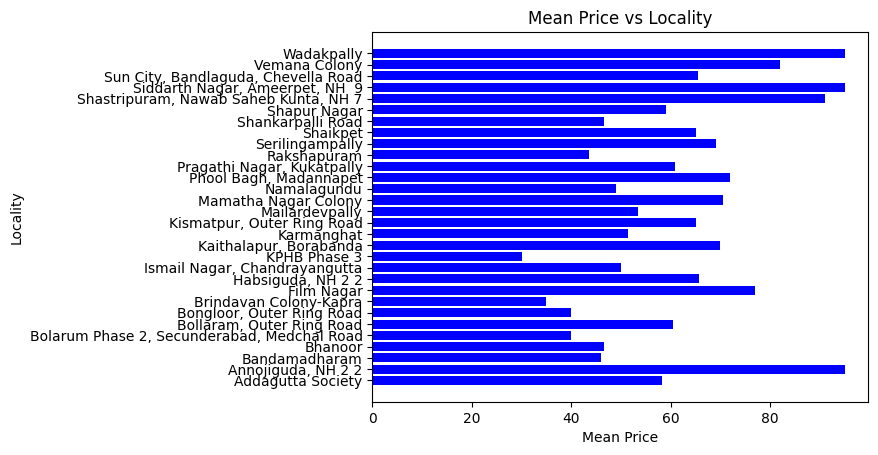

In [15]:
plt.barh(sample_df['Locality'], sample_df['Price'],color='blue')
plt.ylabel('Locality')
plt.xlabel('Mean Price')
plt.title('Mean Price vs Locality')
plt.show()


Adibatla Manikonda, Outer Ring Road Hitech City Aminpur Moti Nagar LB Nagar, NH  9 Tellapur, Outer Ring Road Kompally Srisailam Highway Bachupally Miyapur, NH  9 Kokapet, Outer Ring Road Alkapur Township, Manikonda, Outer Ring Road Uppal, NH 2 2 Chandanagar, NH  9 Hyder Nagar, NH  9 Tellapur, Outer Ring Road Manikonda, Outer Ring Road Bachupally Toli Chowki Shamirpet Nizampet Tellapur, Outer Ring Road Nagole Gundlapochampally, Outer Ring Road Tukkuguda, Srisailam Highway Bachupally LB Nagar, NH  9 Bahadurpally Kollur, Outer Ring Road Madinaguda, Hafeezpet, NH  9 Nallagandla, Serilingampally Adibatla Adibatla Hydershakote Miyapur, NH  9 Bachupally Yapral Bachupally Malkajgiri Alwal Kondakal Aminpur Bachupally Bachupally Aminpur Sai Anurag Colony Chaitanyapuri, Kothapet Aminpur Kousalya Colony  Masjid Banda Narapally Kollur, Outer Ring Road Chanda Nagar Tellapur, Outer Ring Road Kollur, Outer Ring Road Chanda Nagar Miyapur, NH  9 Kollur, Outer Ring Road Gundlapochampally, Outer Ring Road

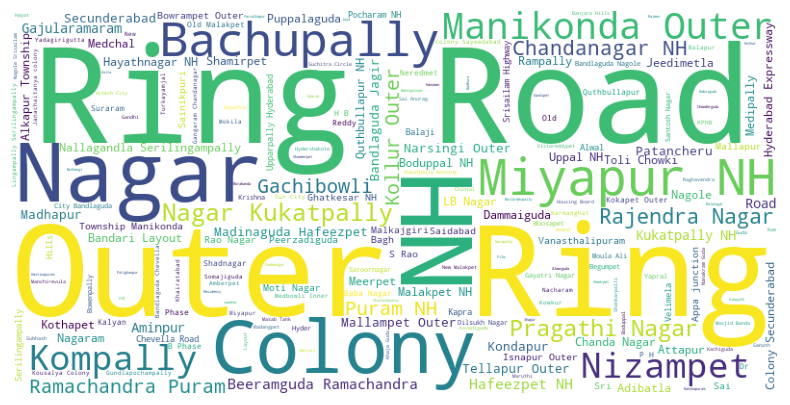

In [17]:
from wordcloud import WordCloud

text = ' '.join(df['Locality'].dropna())
print(text)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [18]:
groupeddata = df.groupby('Builder')['Price'].mean().reset_index()
random_locations = groupeddata['Builder'].sample(n=30, random_state=42)
sample_df = groupeddata[groupeddata['Builder'].isin(random_locations)]
sample_df.head()


,Builder,Price
4,ASV Property Management,93.0
9,Amma Developers,30.0
11,Anmol,76.0
12,Anuhar Homes Pvt. Ltd.,73.0
18,Blue Sky Realtors,52.0


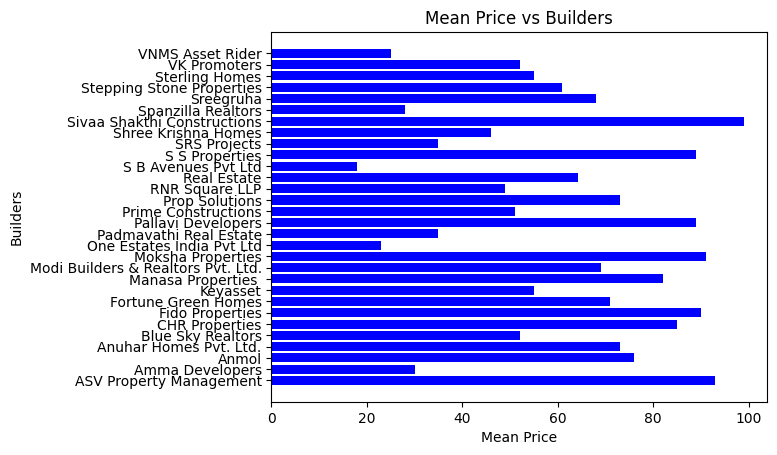

In [19]:
plt.barh(sample_df['Builder'], sample_df['Price'],color='blue')
plt.ylabel('Builders')
plt.xlabel('Mean Price')
plt.title('Mean Price vs Builders')
plt.show()


MULTIPLE LINEAR REGRESSION


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder


In [95]:
X = df[['Locality', 'Sqft']]
X_encoded = pd.get_dummies(X, columns=['Locality'], drop_first=True)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=101)
model = LinearRegression()
model.fit(X_train, y_train)


[5.85251145e+01 6.70948068e+01 4.83877782e+01 7.63034913e+01
 3.81763422e+10]


In [97]:
predictions = model.predict(X_test)
print((predictions[:5]))


[5.85251145e+01 6.70948068e+01 4.83877782e+01 7.63034913e+01
 3.81763422e+10]


In [98]:
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))


mean_squared_error :  4.374156443638299e+19
mean_absolute_error :  1257950869.6950033
